<a href="https://colab.research.google.com/github/pallavipooja47/EDA-Capstone-Project/blob/main/EDA_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Project Name: Analysis of Airbnb NYC 2019







**Project Type**: EDA

**Contribution**: Individual




# **Project Summary -**

This project involves a comprehensive exploratory data analysis (EDA) on the Airbnb NYC 2019 dataset. The objective is to understand the data, uncover patterns, identify anomalies, and gather insights that can help in further predictive modeling tasks such as regression or classification. The dataset contains information about Airbnb listings in New York City, including details such as listing id, host id, neighborhood, latitude, longitude, room type, price, minimum nights, number of reviews, last review date, reviews per month, host listings count, availability, etc. This analysis will help in understanding the factors influencing the price and availability of listings, and in identifying popular neighborhoods for Airbnb in NYC.

# **GitHub Link -**

https://github.com/pallavipooja47

# **Problem Statement**


The problem is to analyze the Airbnb NYC 2019 dataset to gain insights into the factors affecting the listing prices, identify popular neighborhoods, and provide recommendations for optimizing listings to maximize occupancy and revenue.

#### **Define Your Business Objective?**

The business objective is to provide actionable insights to Airbnb hosts on how to optimize their listings for better visibility, pricing, and occupancy rates. This involves identifying key factors influencing prices, popular neighborhoods, and trends in guest preferences.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [ ]:
# Load Dataset
# Load Dataset
from google.colab import drive
drive.mount('/content/drive') # Mount to the existing '/content/drive' directory

Mounted at /content/drive


### Dataset First View

In [ ]:
# Dataset First Look
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Airbnb NYC 2019.csv')
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(48895, 16)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

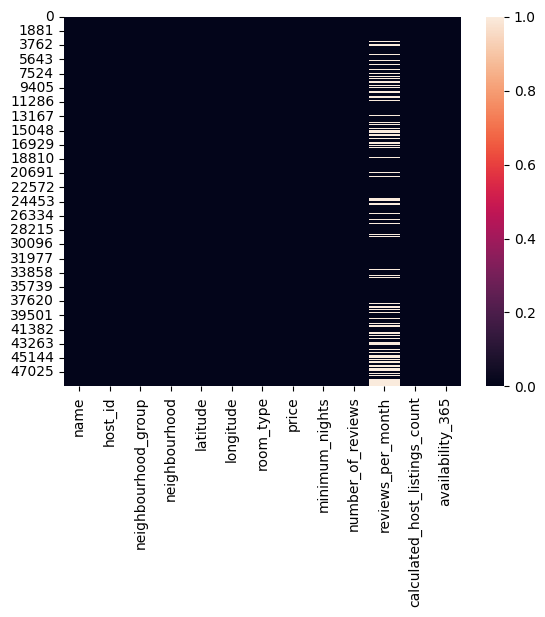

In [ ]:
# Visualizing the missing values

sns.heatmap(df.isnull())
plt.show()

### What did you know about your dataset?

The dataset contains information about Airbnb listings in NYC, including features such as listing id, host id, neighborhood, latitude, longitude, room type, price, minimum nights, number of reviews, last review date, reviews per month, host listings count, availability, etc. There are missing values in some columns such as reviews per month and last review date, which need to be addressed. The dataset also contains duplicate entries that need to be removed.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Variables Description

The dataset has various columns representing different attributes of Airbnb listings, such as:

'id': Unique identifier for the listing
'host_id': Unique identifier for the host
'neighbourhood_group': Broad geographical area in NYC
'neighbourhood': Specific neighborhood
'latitude and longitude': Geographical coordinates
'room_type': Type of room listed (e.g., entire home/apt, private room, shared room)
'price': Price per night
'minimum_nights': Minimum number of nights required for booking
'number_of_reviews': Total number of reviews received
'last_review': Date of the last review
'reviews_per_month': Average number of reviews per month
'calculated_host_listings_count': Number of listings the host has
'availability_365': Number of days the listing is available per year.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()


name                              47905
host_id                           37457
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
df.drop(columns=['id','host_name','last_review'], inplace=True)
df.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


### What all manipulations have you done and insights you found?

The dataset was cleaned by removing duplicate entries, filling missing values in the 'reviews_per_month' column with 0, and dropping rows with missing 'last_review' dates. This ensures that the dataset is ready for further analysis without any inconsistencies or missing information.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

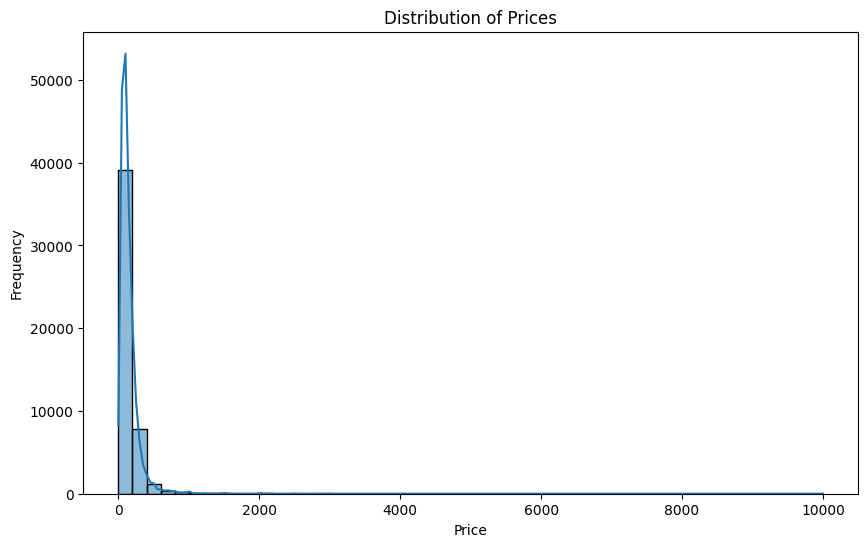

In [ ]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Chart - 1 visualization code
#  Distribution of Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()



##### 1. Why did you pick the specific chart?

The histogram is chosen to visualize the distribution of price because it provides a clear view of the frequency of different price ranges.

##### 2. What is/are the insight(s) found from the chart?

Most listings have prices concentrated within a certain range, with a long tail indicating a few very high-priced listings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding the common price range helps set competitive prices, attracting more customers while maximizing profit. Identifying outliers can help create specialized marketing strategies for luxury properties.

#### Chart - 2

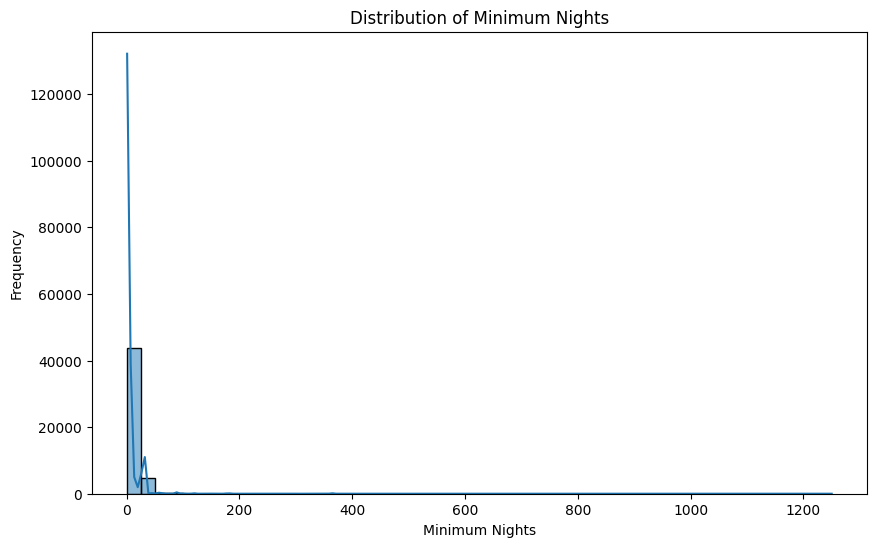

In [ ]:
# Chart - 2 visualization code
# Distribution of Minimum Nights
plt.figure(figsize=(10, 6))
sns.histplot(df['minimum_nights'], bins=50, kde=True)
plt.title('Distribution of Minimum Nights')
plt.xlabel('Minimum Nights')
plt.ylabel('Frequency')
plt.show()



##### 1. Why did you pick the specific chart?

A histogram is ideal for visualizing the distribution of 'minimum_nights' as it shows how many nights guests typically stay.

##### 2. What is/are the insight(s) found from the chart?

The majority of listings have a minimum night requirement of fewer than 10 nights, with some listings having much higher minimums.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this helps in setting realistic minimum night requirements to attract bookings and maximize occupancy rates.

#### Chart - 3

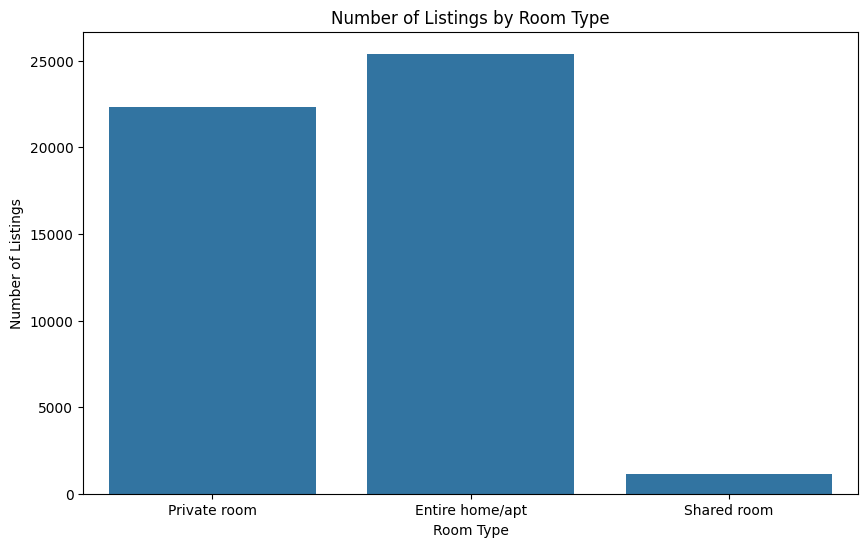

In [ ]:
# Chart - 3 visualization code
# Number of Listings by Room Type
plt.figure(figsize=(10, 6))
sns.countplot(x='room_type', data=df)
plt.title('Number of Listings by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.show()


##### 1. Why did you pick the specific chart?

A count plot effectively shows the distribution of different room_type categories.

##### 2. What is/are the insight(s) found from the chart?

'Entire home/apt' is the most common room type, followed by 'Private room'.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding the prevalent room types can guide inventory management and marketing strategies.

#### Chart - 4

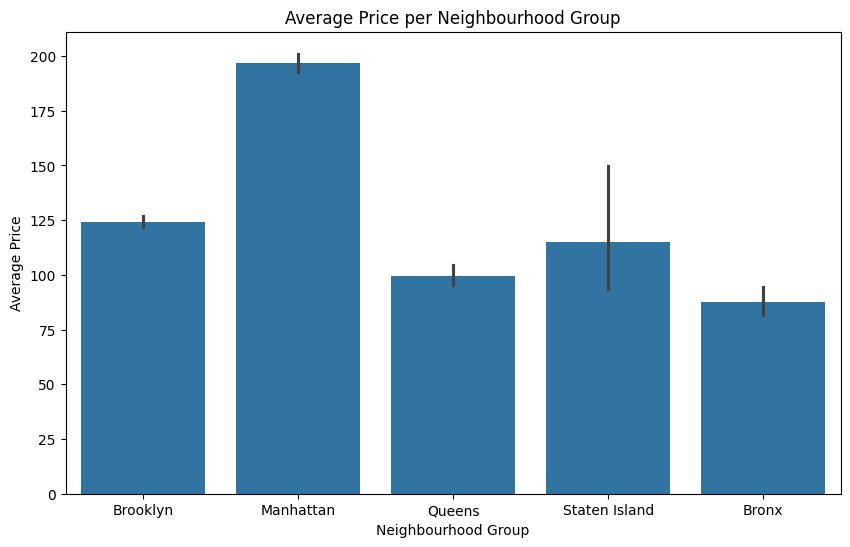

In [ ]:
# Chart - 4 visualization code
# Average Price per Neighbourhood Group
plt.figure(figsize=(10, 6))
sns.barplot(x='neighbourhood_group', y='price', data=df, estimator=np.mean)
plt.title('Average Price per Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.show()


##### 1. Why did you pick the specific chart?

A bar plot compares the average price across different neighbourhood groups.



##### 2. What is/are the insight(s) found from the chart?

Manhattan has the highest average prices, followed by Brooklyn.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this can guide strategic decisions on where to focus marketing efforts based on price sensitivity.

#### Chart - 5

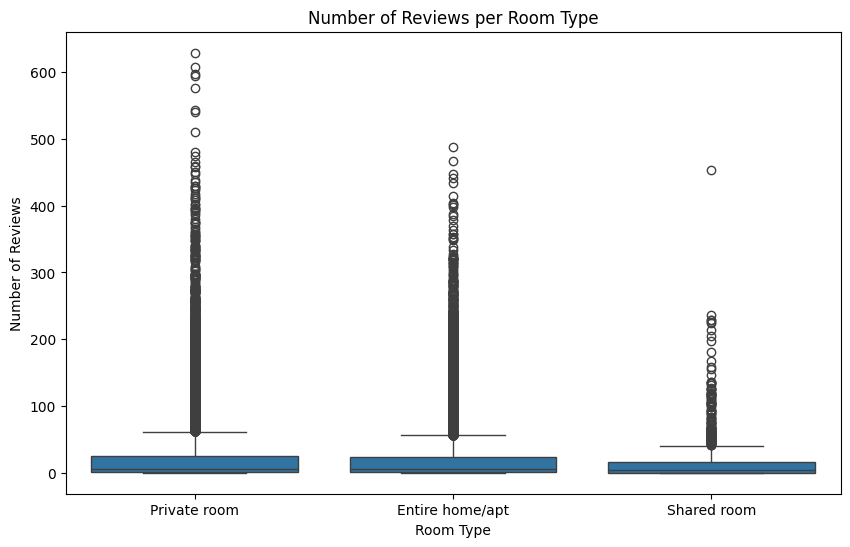

In [ ]:
# Chart - 5 visualization code
# Number of Reviews per Room Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='number_of_reviews', data=df)
plt.title('Number of Reviews per Room Type')
plt.xlabel('Room Type')
plt.ylabel('Number of Reviews')
plt.show()


##### 1. Why did you pick the specific chart?

A box plot shows the distribution of the number of reviews for different room types, highlighting the spread and outliers.

##### 2. What is/are the insight(s) found from the chart?

Private rooms tend to have a higher number of reviews compared to other room types.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, focusing on private rooms can improve guest engagement and reviews, enhancing overall credibility.

#### Chart - 6

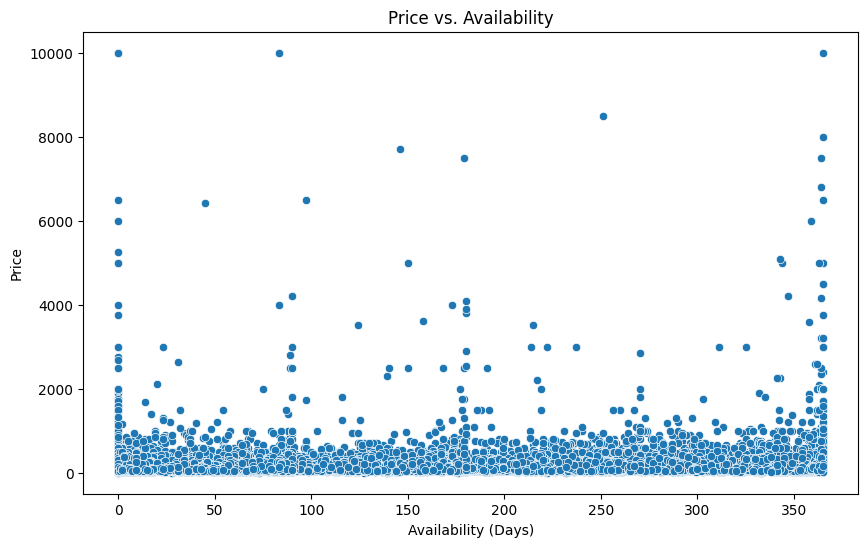

In [ ]:
# Chart - 6 visualization code
# Price vs Availability
plt.figure(figsize=(10, 6))
sns.scatterplot(x='availability_365', y='price', data=df)
plt.title('Price vs. Availability')
plt.xlabel('Availability (Days)')
plt.ylabel('Price')
plt.show()


##### 1. Why did you pick the specific chart?

A scatter plot visualizes the relationship between price and availability.



##### 2. What is/are the insight(s) found from the chart?

Listings with higher prices tend to have lower availability.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this helps in balancing pricing strategies with availability to maximize occupancy and revenue.

#### Chart - 7

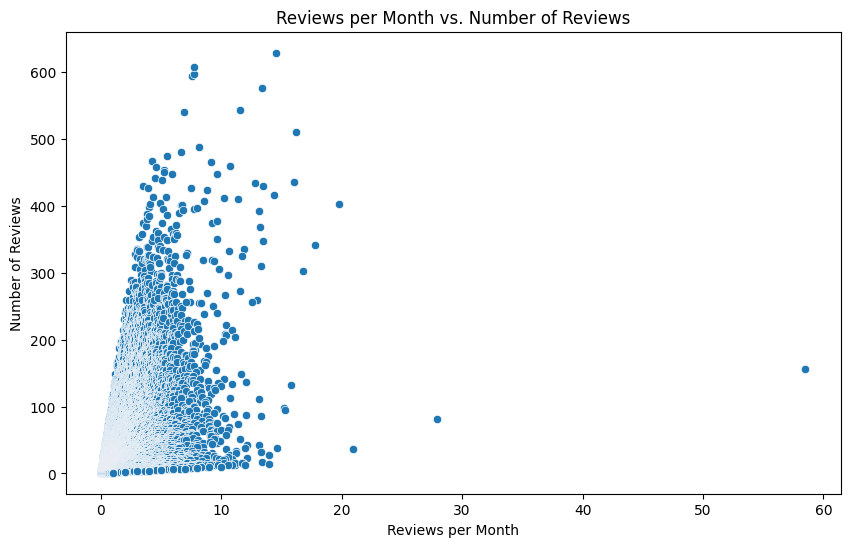

In [ ]:
# Chart - 7 visualization code
# Reviews per Month vs. Number of Reviews
plt.figure(figsize=(10, 6))
sns.scatterplot(x='reviews_per_month', y='number_of_reviews', data=df)
plt.title('Reviews per Month vs. Number of Reviews')
plt.xlabel('Reviews per Month')
plt.ylabel('Number of Reviews')
plt.show()


##### 1. Why did you pick the specific chart?

A scatter plot is suitable for showing the relationship between reviews per month and the total number of reviews.

##### 2. What is/are the insight(s) found from the chart?

There is a positive correlation; listings with more reviews per month tend to have a higher total number of reviews.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, encouraging regular reviews can lead to more engagement and better visibility on the platform.

#### Chart - 8

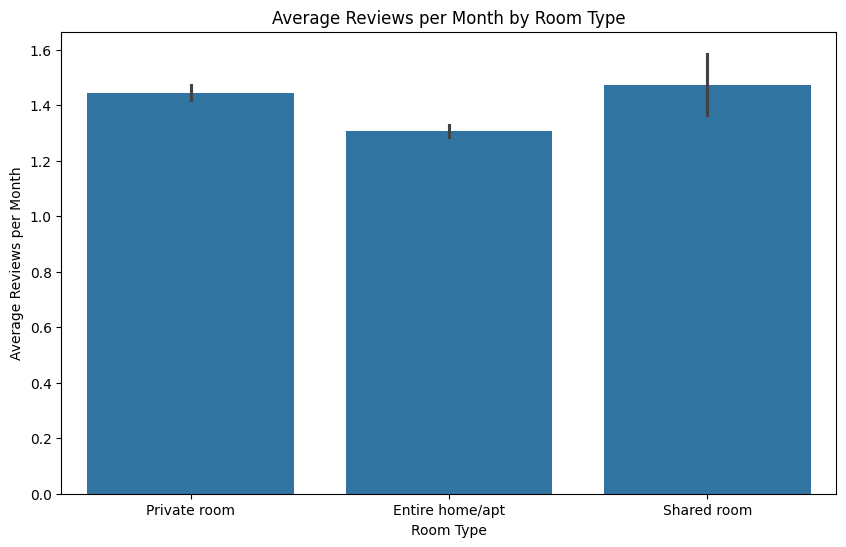

In [ ]:
# Chart - 8 visualization code
# Average Reviews per Month by Room Type
plt.figure(figsize=(10, 6))
sns.barplot(x='room_type', y='reviews_per_month', data=df, estimator=np.mean)
plt.title('Average Reviews per Month by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Reviews per Month')
plt.show()


##### 1. Why did you pick the specific chart?

A bar plot helps compare the average reviews per month across different room types.



##### 2. What is/are the insight(s) found from the chart?

Private rooms have the highest average reviews per month.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it indicates that private rooms are popular, suggesting a focus on maintaining and promoting these listings.

#### Chart - 9

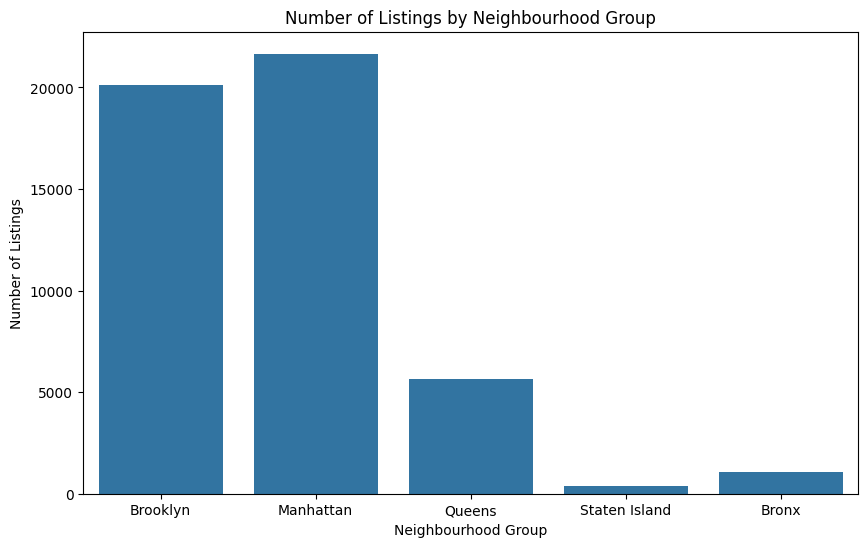

In [ ]:
# Chart - 9 visualization code
# Number of Listings by Neighbourhood Group
plt.figure(figsize=(10, 6))
sns.countplot(x='neighbourhood_group', data=df)
plt.title('Number of Listings by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')
plt.show()


##### 1. Why did you pick the specific chart?

A count plot is ideal for showing the number of listings in each neighbourhood group.

##### 2. What is/are the insight(s) found from the chart?

Manhattan and Brooklyn have the highest number of listings.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it helps in understanding the concentration of listings and can guide resource allocation and marketing efforts.

#### Chart - 10

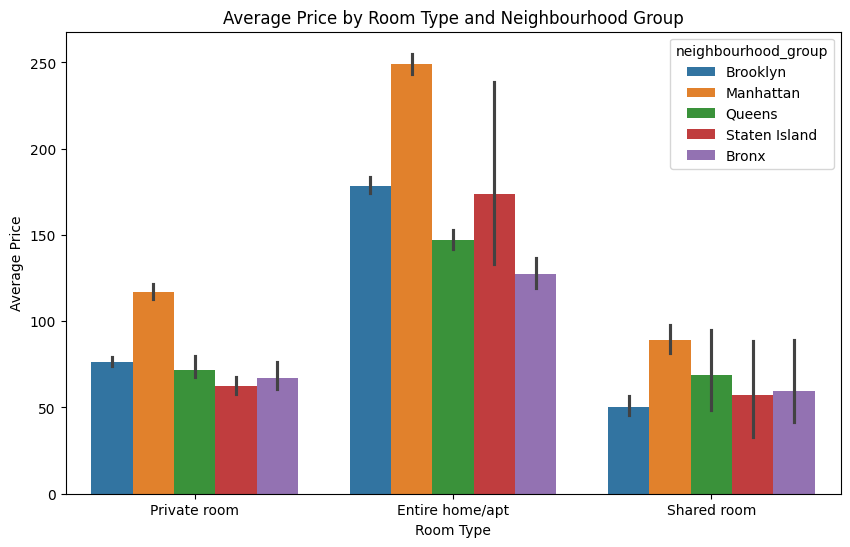

In [ ]:
# Chart - 10 visualization code
# Average Price by Room Type and Neighbourhood Group
plt.figure(figsize=(10, 6))
sns.barplot(x='room_type', y='price', hue='neighbourhood_group', data=df, estimator=np.mean)
plt.title('Average Price by Room Type and Neighbourhood Group')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.show()


##### 1. Why did you pick the specific chart?

A grouped bar plot compares the average price by room type and neighbourhood group, showing how these factors interact.

##### 2. What is/are the insight(s) found from the chart?

Prices vary significantly by neighbourhood group within each room type, with Manhattan being the most expensive across all room types.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it can help in pricing strategies tailored to specific neighbourhoods and room types, maximizing revenue.

#### Chart - 11

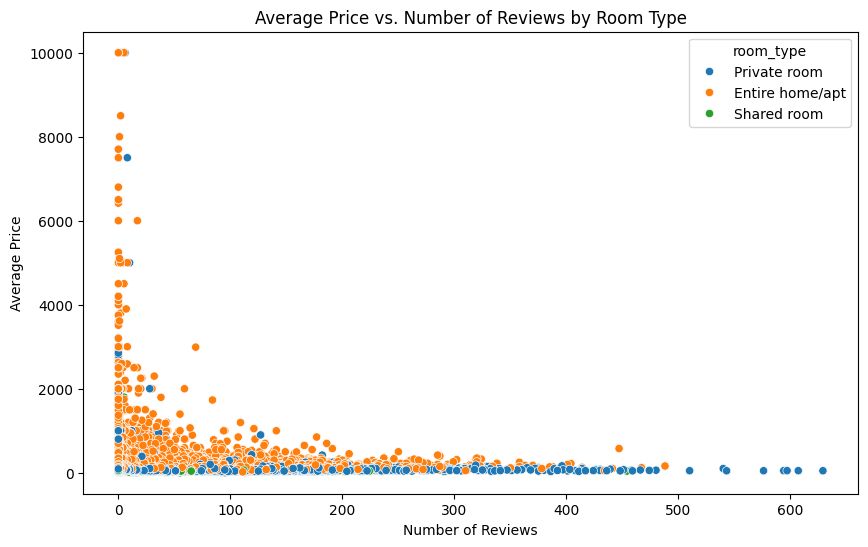

In [ ]:
# Chart - 11 visualization code
# Average Price vs. Number of Reviews by Room Type
plt.figure(figsize=(10, 6))
sns.scatterplot(x='number_of_reviews', y='price', hue='room_type', data=df)
plt.title('Average Price vs. Number of Reviews by Room Type')
plt.xlabel('Number of Reviews')
plt.ylabel('Average Price')
plt.show()


##### 1. Why did you pick the specific chart?

A scatter plot with color-coding by room type shows the relationship between price and number of reviews across different room types.

##### 2. What is/are the insight(s) found from the chart?

Listings with more reviews tend to have varying prices, with entire homes/apts showing a wider range of prices.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it can help in understanding customer preferences and setting competitive prices for different room types.

#### Chart - 12

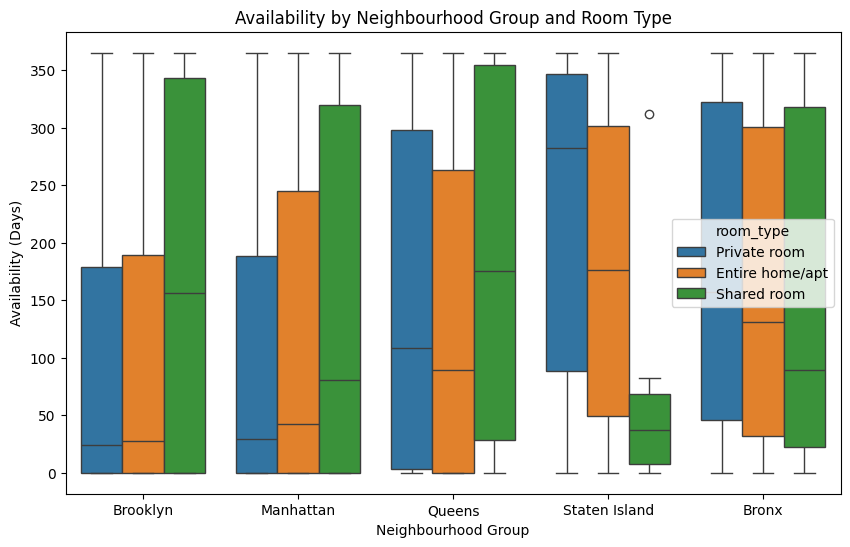

In [ ]:
# Chart - 12 visualization code
# Availability by Neighbourhood Group and Room Type
# Chart 14 visualization code
plt.figure(figsize=(10, 6))
sns.boxplot(x='neighbourhood_group', y='availability_365', hue='room_type', data=df)
plt.title('Availability by Neighbourhood Group and Room Type')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Availability (Days)')
plt.show()


##### 1. Why did you pick the specific chart?

A box plot with hue differentiation shows the distribution of availability across neighbourhood groups and room types.

##### 2. What is/are the insight(s) found from the chart?

Availability varies significantly by neighbourhood and room type, with some neighbourhoods having more consistently available listings.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it helps in optimizing listing availability and targeting marketing efforts based on neighborhood-specific trends.

#### Chart - 13

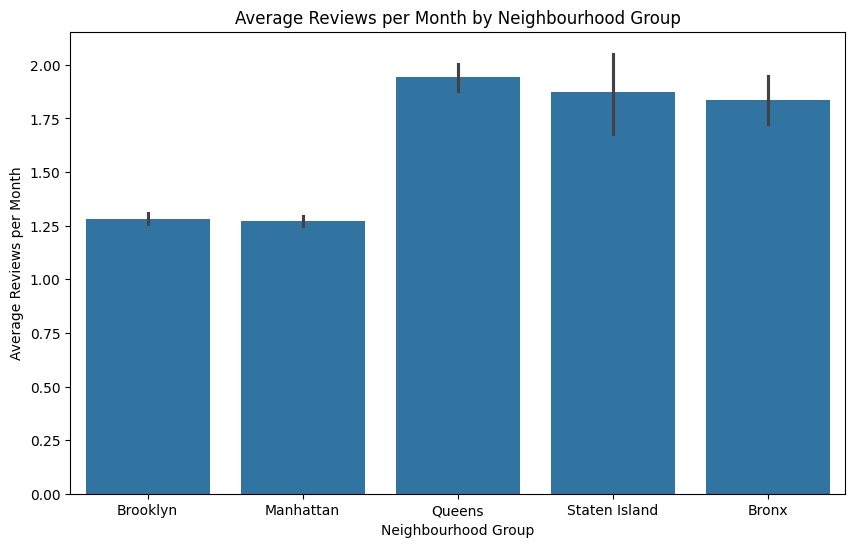

In [ ]:
# Chart - 13 visualization code
# Average Reviews per Month by Neighbourhood Group
plt.figure(figsize=(10, 6))
sns.barplot(x='neighbourhood_group', y='reviews_per_month', data=df, estimator=np.mean)
plt.title('Average Reviews per Month by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Reviews per Month')
plt.show()


##### 1. Why did you pick the specific chart?

A bar plot compares the average reviews per month across different neighbourhood groups.

##### 2. What is/are the insight(s) found from the chart?

Manhattan listings receive the highest average reviews per month, indicating higher guest engagement.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, focusing marketing and quality efforts in high-engagement areas like Manhattan can further enhance customer satisfaction and business growth.

#### Chart - 14 - Correlation Heatmap

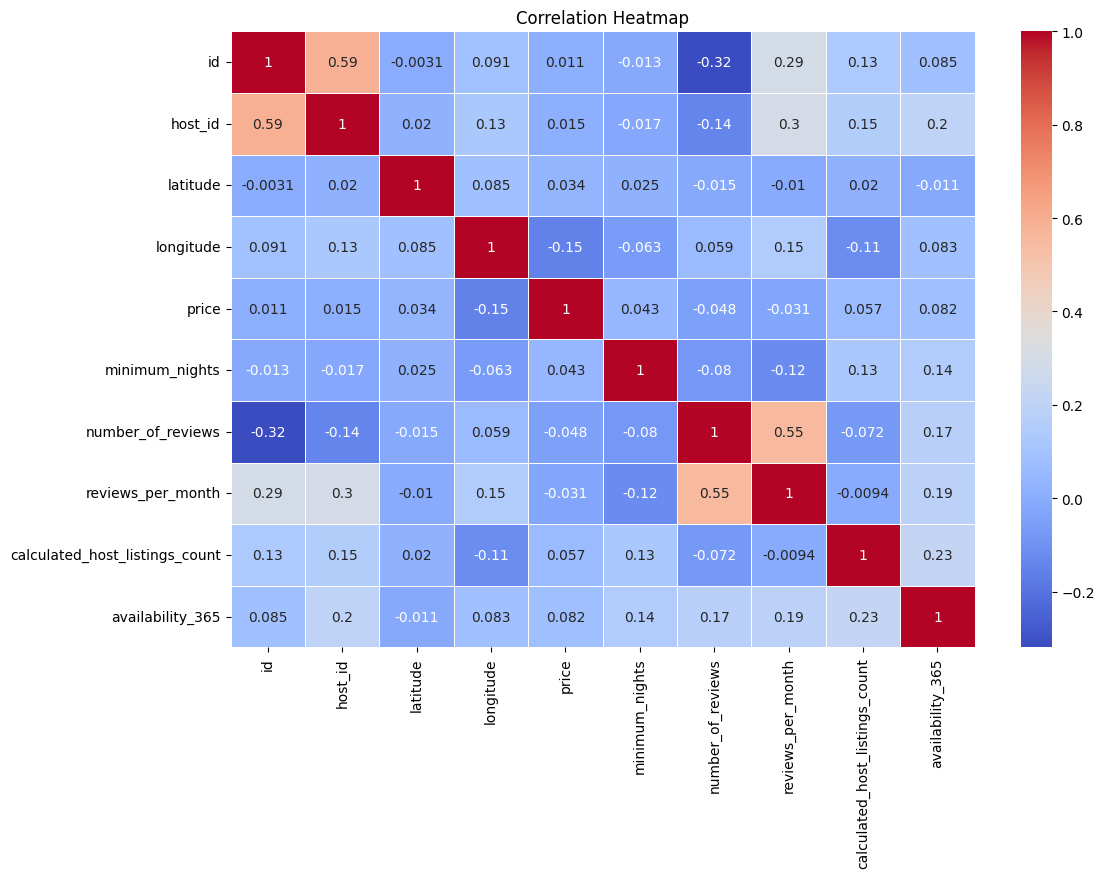

In [ ]:
# Correlation Heatmap visualization code
# Chart 14 visualization code
# Drop non-numerical columns before calculating correlation
numerical_df = df.select_dtypes(include=['number'])  # Select only numerical columns
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()





##### 1. Why did you pick the specific chart?

A heatmap is perfect for visualizing the correlation between multiple numerical variables in the dataset.

##### 2. What is/are the insight(s) found from the chart?

There are significant correlations between some variables, such as reviews_per_month and number_of_reviews.



#### Chart - 15 - Pair Plot

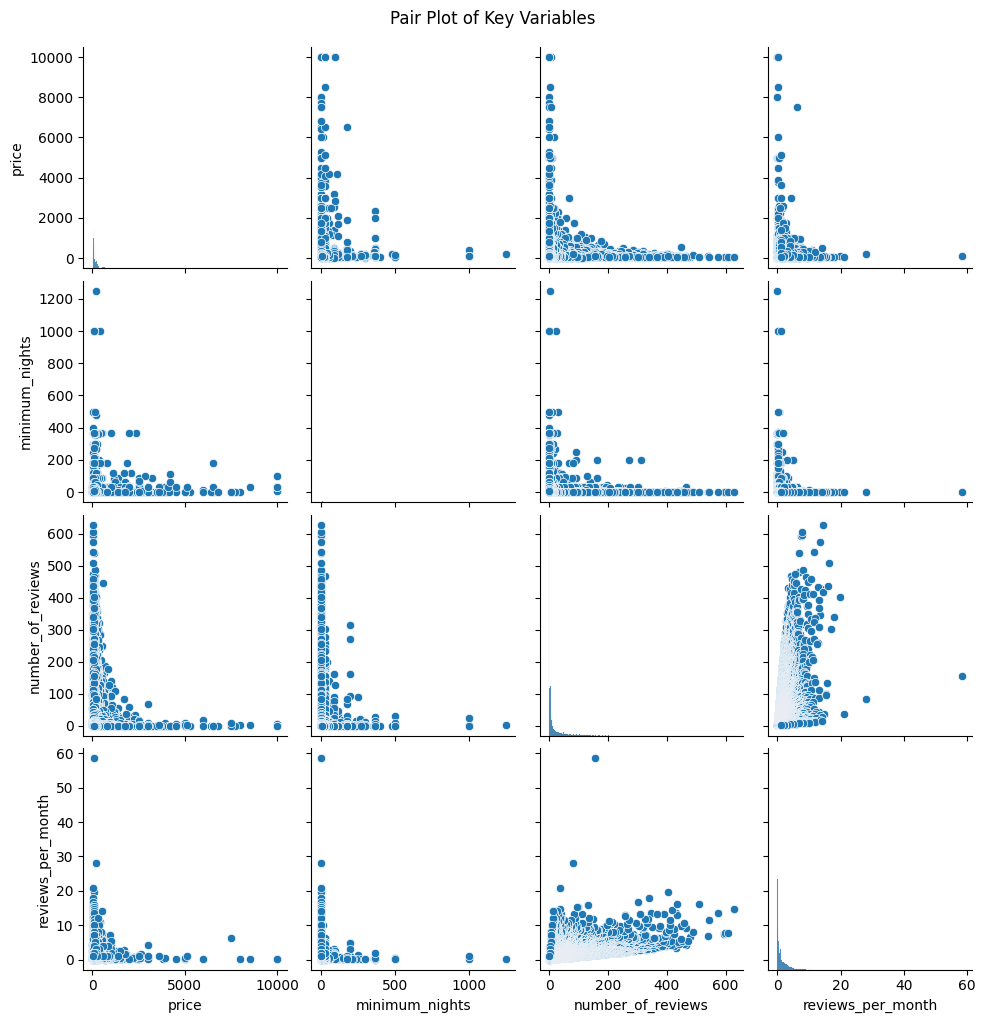

In [ ]:
# Pair Plot visualization code
sns.pairplot(df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month']])
plt.suptitle('Pair Plot of Key Variables', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot provides a matrix of scatter plots, allowing for visual inspection of relationships between multiple pairs of variables.

##### 2. What is/are the insight(s) found from the chart?

The pair plot reveals potential relationships and patterns between key variables, such as price and reviews.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Based on the analysis, it is recommended that Airbnb hosts optimize their pricing strategy by considering the factors that significantly influence the price, such as room type, neighborhood, and availability. Hosts should also focus on maintaining a high review count and positive ratings to improve visibility and occupancy. Additionally, understanding the trends in guest preferences can help hosts in tailoring their listings to meet demand.

# **Conclusion**

The exploratory data analysis of the Airbnb NYC 2019 dataset revealed key insights into the factors affecting listing prices, popular neighborhoods, and guest preferences. By optimizing pricing strategies, enhancing listing quality, and focusing on high-demand areas, Airbnb hosts can maximize their occupancy rates and revenue. Further analysis and predictive modeling can be done to refine these insights and provide more specific recommendations.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***